In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

**Tasks**
1. Find the linear regression equation for this data.

2. Chart the original data and the equation on the chart.

3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df2 = pd.DataFrame(ground_cricket_data)

In [3]:
df2

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
print(df2.shape)
df2.head()

(15, 2)


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [5]:
df2.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [6]:
df2=df2.drop_duplicates()

In [ ]:
df2.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [7]:
df2.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [8]:
iqr=df2['Chirps/Second'].quantile(0.75)-df2['Chirps/Second'].quantile(0.25)
upper_threshold=df2['Chirps/Second'].quantile(0.75)+(1.5*iqr)
lower_threshold=df2['Chirps/Second'].quantile(0.25)-(1.5*iqr)
(lower_threshold,upper_threshold)

(12.9, 19.699999999999996)

no outlier in chirps/second column

In [9]:
iqr=df2['Ground Temperature'].quantile(0.75)-df2['Ground Temperature'].quantile(0.25)
upper_threshold=df2['Ground Temperature'].quantile(0.75)+(1.5*iqr)
lower_threshold=df2['Ground Temperature'].quantile(0.25)-(1.5*iqr)
(lower_threshold,upper_threshold)

(58.400000000000006, 98.4)

no outlier in ground temp column

EDA

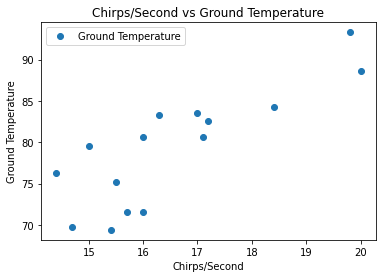

In [10]:
df2.plot(x='Chirps/Second',y='Ground Temperature',style='o')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.title('Chirps/Second vs Ground Temperature')
plt.show()

In [11]:
df2[['Chirps/Second','Ground Temperature']].corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


good correlation for this both column

split

In [12]:
df2['Chirps/Second'].values

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 16. , 17. , 14.4])

In [13]:
df2['Ground Temperature'].values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

In [40]:
X=df2.loc[:,['Chirps/Second']].values
y=df2.loc[:,'Ground Temperature'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [41]:
y_test

array([80.6, 71.6, 80.6, 69.7])

In [42]:
X_train.shape, X_test.shape

((11, 1), (4, 1))

scaling

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
X_test

array([[ 0.15679379],
       [-0.6221173 ],
       [-0.45520778],
       [-1.17848236]])

model

In [45]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
print(regressor.intercept_)#c value

80.69999999999999


In [47]:
print(regressor.coef_)# m value

[5.64710538]


linear equation:#predicted_temp= 3.469 * (Chirps/Second) + 

In [48]:
#predicted_temp= 6.1 * (Chirps/Second) + 80.5

at 18 Chirps/Second prdicted temperature is 194.4

In [49]:
regressor.predict([[18]])

array([182.34789685])

In [50]:
y_pred = regressor.predict(X_test)
y_pred



array([81.58543106, 77.18683807, 78.12939371, 74.04498593])

In [51]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,80.6,81.585431
1,71.6,77.186838
2,80.6,78.129394
3,69.7,74.044986


In [52]:
regressor.predict([[18]])

array([182.34789685])

In [53]:
from sklearn import metrics
print('R2-SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)

R2-SCORE: 0.4329129069778096


0.4329129069778096

In [ ]:
# if r2 score is above 0 its a good model if its below 0 to -infinity its a useless model

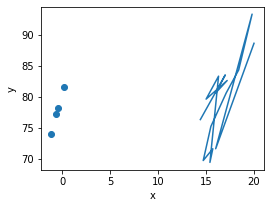

In [54]:

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(X_test,y_pred)
ax.plot(X,y)

ax.set_xlabel('x')
ax.set_ylabel('y')


plt.show()


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df1 = pd.read_fwf("brain_body.txt")

NameError: ignored

In [ ]:
df1

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [ ]:
df1.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df1=df1.drop_duplicates()

In [ ]:
df1.shape

(62, 2)

In [ ]:
df1.dtypes

Brain    float64
Body     float64
dtype: object

In [ ]:
df1.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
IQR=df1['Brain'].quantile(0.75)-df1['Brain'].quantile(0.25)
upper_threshold=df1['Brain'].quantile(0.75)+(1.5*IQR)
lower_threshold=df1['Brain'].quantile(0.25)-(1.5*IQR)
(lower_threshold,upper_threshold)

(-70.80375000000001, 119.60625)

In [ ]:
df1.Brain=df1.Brain.clip(-70,119)

In [ ]:
IQR=df1['Body'].quantile(0.75)-df1['Body'].quantile(0.25)
upper_threshold=df1['Body'].quantile(0.75)+(1.5*IQR)
lower_threshold=df1['Body'].quantile(0.25)-(1.5*IQR)
(lower_threshold,upper_threshold)

(-238.375, 408.625)

In [ ]:
df1.Body=df1.Body.clip(-238, 408)

In [ ]:
df1.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.078694,104.585806
std,45.015189,148.446708
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.000000,408.000000


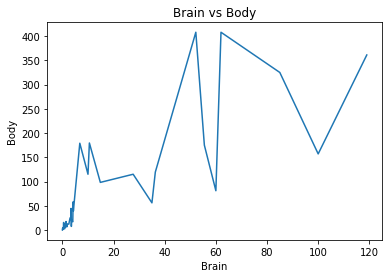

In [ ]:
df1.groupby('Brain')['Body'].mean().plot()
import matplotlib.pyplot as plt
# df1.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [ ]:
df1[['Brain','Body']].corr()

,Brain,Body
Brain,1.000000,0.888422
Body,0.888422,1.000000


In [ ]:
# X = df1['Brain']
# X = X.to_frame()
# y=df1['Body'].values
# # print(X)

In [ ]:
# X = df['Brain']
# X = x.to_frame()
# y = df['Body']

In [ ]:
X=df1.loc[:,['Brain']].values
y=df1.loc[:,'Body'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
X_test

array([[1.040e-01],
       [1.190e+02],
       [5.000e-03],
       [4.250e-01],
       [1.000e+02],
       [1.350e+00],
       [1.200e-01],
       [7.850e-01],
       [3.633e+01],
       [3.385e+00],
       [4.190e+00],
       [5.550e+01],
       [2.300e-02]])

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('intercept:', regressor.intercept_)
print('coefficient:', regressor.coef_)

intercept: 22.20008228806529
coefficient: [2.9780584]


In [ ]:
regressor.predict([[14]])

array([63.89289991])

In [ ]:
y_pred = regressor.predict(X_test_scaled)
y_pred

array([20.23928408, 27.97576325, 20.23284222, 20.26017133, 26.7394466 ,
       20.32036043, 20.24032519, 20.28359628, 22.59648445, 20.45277645,
       20.50515723, 23.84386288, 20.23401347])

In [ ]:
data=pd.DataFrame({'Acutal': y_test, 'Predicted': y_pred})
data

,Acutal,Predicted
0,2.50,20.239284
1,408.00,27.975763
2,0.14,20.232842
3,6.40,20.260171
4,157.00,26.739447
5,8.10,20.320360
6,1.00,20.240325
7,3.50,20.283596
8,119.50,22.596484
9,44.50,20.452776


In [ ]:
regressor.predict([[14.5]])

array([65.38192912])

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
print('r2: ', regressor.score(X_test,y_test))

R2- SCORE: -0.18390547627676512
r2:  0.8118693178448536


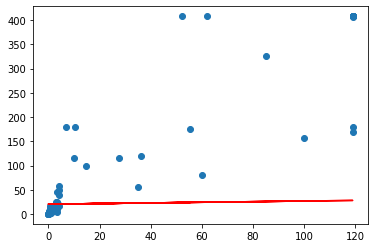

In [ ]:
plt.scatter(X, y)
plt.plot(X_test,y_pred, color='red')
plt.show()

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:
df.tail()

,Sex,Rank,Year,Degree,YSdeg,Salary
47,1,1,2,1,2,15350
48,0,1,1,1,1,16244
49,1,1,1,1,1,16686
50,1,1,1,1,1,15000
51,1,1,0,1,2,20300


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.8 KB


In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


to find outlier using iqr


In [ ]:
iqr=df['Sex'].quantile(0.75)-df['Sex'].quantile(0.25)
upper_threshold=df['Sex'].quantile(0.75)+(1.5*iqr)
lower_threshold=df['Sex'].quantile(0.25)-(1.5*iqr)
(lower_threshold,upper_threshold)

(-1.5, 2.5)

no outlier in sex column

In [ ]:
iqr=df['Rank'].quantile(0.75)-df['Rank'].quantile(0.25)
upper_threshold=df['Rank'].quantile(0.75)+(1.5*iqr)
lower_threshold=df['Rank'].quantile(0.25)-(1.5*iqr)
(lower_threshold,upper_threshold)

(-2.0, 6.0)

no outlier in Rank column

In [ ]:
iqr=df['Year'].quantile(0.75)-df['Year'].quantile(0.25)
upper_threshold=df['Year'].quantile(0.75)+(1.5*iqr)
lower_threshold=df['Year'].quantile(0.25)-(1.5*iqr)
(lower_threshold,upper_threshold)

(-9.0, 23.0)

upper_thershold have outlier but(23,25) not much difference so we can avoid not all outlier are bad

In [ ]:
iqr=df['Degree'].quantile(0.75)-df['Degree'].quantile(0.25)
upper_threshold=df['Degree'].quantile(0.75)+(1.5*iqr)
lower_threshold=df['Degree'].quantile(0.25)-(1.5*iqr)
(lower_threshold,upper_threshold)

(-1.5, 2.5)

no outlier in degree column

In [ ]:
iqr=df['YSdeg'].quantile(0.75)-df['YSdeg'].quantile(0.25)
upper_threshold=df['YSdeg'].quantile(0.75)+(1.5*iqr)
lower_threshold=df['YSdeg'].quantile(0.25)-(1.5*iqr)
(lower_threshold,upper_threshold)

(-18.0, 48.0)

no outlier in YSdeg column


data is clean now we can proceed with EDA

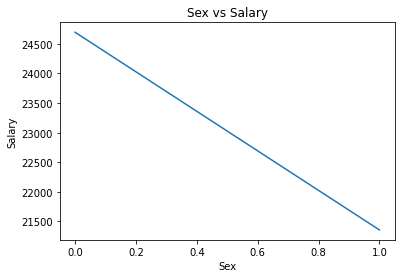

In [ ]:
df.groupby('Sex')['Salary'].mean().plot()
import matplotlib.pyplot as plt
# df.plot(x='Sex', y='Salary', style='b')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [ ]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


sex and salary column have linear regression(-ve) 

sex column is important feature.

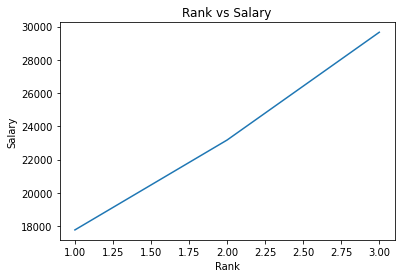

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
df.groupby('Rank')['Salary'].mean().plot()
# import matplotlib.pyplot as plt
# df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
df[['Rank','Salary']].corr()

having +ve linear relationship of rank and salary

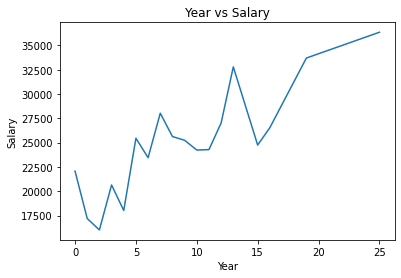

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
df.groupby('Year')['Salary'].mean().plot()
# import matplotlib.pyplot as plt
# df.plot(x='Rank', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()
df[['Year','Salary']].corr()

+ve linear ralationship

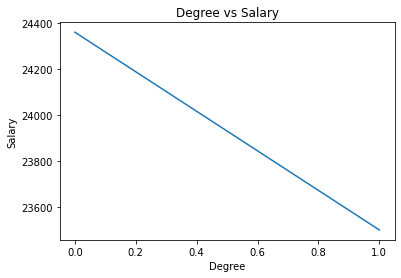

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df.groupby('Degree')['Salary'].mean().plot()
# import matplotlib.pyplot as plt
# df.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['Degree','Salary']].corr()

-0.06 is not a good linear relation try transformation x^2,x^3,logx,squareroot(x)

,transformed,Salary
transformed,1.0,1.0
Salary,1.0,1.0


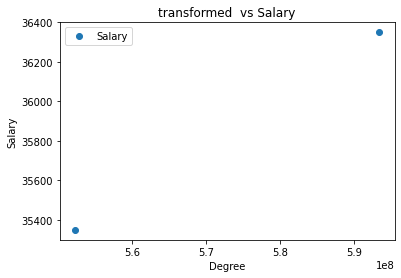

In [ ]:
df['transformed']=np.square(df.groupby('Degree')['Salary'].mean())
# df['transformed']=np.square(df['Degree'])#trasform
df.plot(x='transformed',y='Salary',style='o')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.title('transformed  vs Salary')
df[['transformed','Salary']].corr()

,transformed,Salary
transformed,1.0,1.0
Salary,1.0,1.0


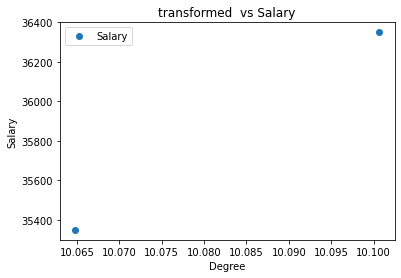

In [ ]:
df['transformed']=np.log(df.groupby('Degree')['Salary'].mean())
df.plot(x='transformed',y='Salary',style='o')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.title('transformed  vs Salary')
df[['transformed','Salary']].corr()

,transformed,Salary
transformed,1.0,1.0
Salary,1.0,1.0


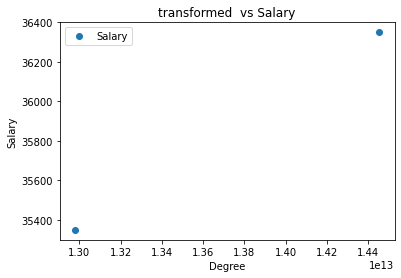

In [ ]:
df['transformed']=np.power(df.groupby('Degree')['Salary'].mean(),3)
df.plot(x='transformed',y='Salary',style='o')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.title('transformed  vs Salary')
df[['transformed','Salary']].corr()

even we do tranformation for the degree column there is not linear relationship so we can exclude this feature but in question it mentioned as consider all 5 feature so we can take /include it

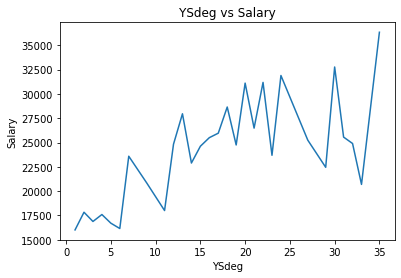

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.groupby('YSdeg')['Salary'].mean().plot()
# import matplotlib.pyplot as plt
# df.plot(x='Rank', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
df[['YSdeg','Salary']].corr()

good linear relationship so we should consider this column

split

In [ ]:
X=df.loc[:,['Sex','Rank','Year','Degree','YSdeg']].values
y=df.loc[:,'Salary'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scale

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test)


model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('intercept:', regressor.intercept_)
print('coefficient:', regressor.coef_)

intercept: 11412.417102484764
coefficient: [ 1665.66443448  5782.54035098   484.45976486 -1660.51751103
  -140.87778609]


In [ ]:
regressor.predict([[0,3,15,1,25]])

array([30844.47246508])

In [ ]:
y_pred = regressor.predict(X_test_scaled)
y_pred

array([15846.74577147, 13300.71906767, 12614.8410777 , 15832.21726809,
        9695.93202206, 13073.65550173, 10376.76426101, 19694.29670945,
        2805.22764976, 16196.36310664, 19261.18415063,  8901.44285474,
        2616.47639032, 19246.65564725, 13206.63639371, 12831.47752088])

In [ ]:
data1=pd.DataFrame({'Acutal': y_test, 'Predicted': y_pred})
data1

,Acutal,Predicted
0,25748,15846.745771
1,24742,13300.719068
2,23725,12614.841078
3,27959,15832.217268
4,24800,9695.932022
5,23300,13073.655502
6,21600,10376.764261
7,31850,19694.296709
8,16700,2805.227650
9,35350,16196.363107


In [ ]:
from sklearn import metrics
print('R2- SCORE:',metrics.r2_score(y_test,y_pred))
print('r2: ', regressor.score(X_test,y_test))

R2- SCORE: -5.223998410089446
r2:  0.820325380287554


r2 score above 0 is considered as good model

predicted_salary= 1665.66443448 *('Sex')+5782.54035098*('Rank')+484.45976486*('Year')+(-1660.51751103)*('Degree')+(-140.87778609)*('YSdeg')+ 11412.4

equation of linear regression:


predicted_salary= m1*('Sex')+m2*('Rank')+m3*('Year')+m4*('Degree')+m5*('YSdeg')+c

rank column is best column be=ased on their correlation and r2 score

for salary and sex feature the correlation is -0.252782
the correlation below -0.2 is also consider as linear correlation 
so sex also place a role in predicting the salary 